# Stock data Analysis

## Simpler Returns

#### Calculate the return of a single Stock (usually there are multiple ways to solve a problem in Python).


Download the data for Microsoft (‘MSFT’) from IEX for the period ‘2015-1-1’ until today

### Importing the Packages

In [236]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats 
import seaborn as sns
%matplotlib inline
sns.set()

#### getting Microsoft stock data from yahoo from 2010-01-01

In [7]:
MSFT = wb.DataReader('MSFT', data_source='yahoo', start='2010-1-1')
MSFT

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.948725
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.956453
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.809431
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.561823
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.724318
...,...,...,...,...,...,...
2021-11-02,333.450012,330.000000,330.309998,333.130005,26487100.0,333.130005
2021-11-03,334.899994,330.649994,333.899994,334.000000,21500100.0,334.000000
2021-11-04,336.540009,329.510010,332.890015,336.440002,23992200.0,336.440002


Apply the .head() and .tail() methods to check if the data is ok. Always pay attention to the dates. Try to get an idea about how the stock price changed during the period.

In [9]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.948725
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.956453
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.809431
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.561823
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.724318


In [10]:
MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-02,333.450012,330.000000,330.309998,333.130005,26487100.0,333.130005
2021-11-03,334.899994,330.649994,333.899994,334.000000,21500100.0,334.000000
2021-11-04,336.540009,329.510010,332.890015,336.440002,23992200.0,336.440002
2021-11-05,338.790009,334.420013,338.510010,336.059998,22564000.0,336.059998
2021-11-08,337.614990,334.679993,337.299988,335.250000,5838859.0,335.250000


## Simple Rate of Return

Calculate the simple returns of ‘MSFT’ for the given timeframe.

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [11]:
MSFT['simple_return'] = (MSFT['Adj Close'] / MSFT['Adj Close'].shift(1)) - 1
print (MSFT['simple_return'])

Date
2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006137
2010-01-07   -0.010400
2010-01-08    0.006897
                ...   
2021-11-02    0.011416
2021-11-03    0.002612
2021-11-04    0.007305
2021-11-05   -0.001129
2021-11-08   -0.002410
Name: simple_return, Length: 2984, dtype: float64


Plot the simple returns on a graph.

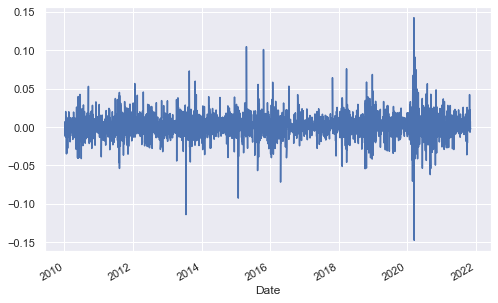

In [12]:
MSFT['simple_return'].plot(figsize=(8, 5))
plt.show()

Calculate the average daily return.

In [14]:
avg_returns_d = MSFT['simple_return'].mean()
avg_returns_d

0.0010097496930236323

Estimate the average annual return using the number of trading days (250)

In [15]:
avg_returns_a = MSFT['simple_return'].mean() * 250
avg_returns_a

0.25243742325590807

Print the percentage version of the result as a float with 2 digits after the decimal point.

In [16]:
print (str(round(avg_returns_a, 4) * 100) + ' %')

25.240000000000002 %


### Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

Calculate the Log returns for Microsoft

In [18]:
MSFT['log_return'] = np.log(MSFT['Adj Close'] / MSFT['Adj Close'].shift(1))
print (MSFT['log_return'])

Date
2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
2010-01-08    0.006873
                ...   
2021-11-02    0.011351
2021-11-03    0.002608
2021-11-04    0.007279
2021-11-05   -0.001130
2021-11-08   -0.002413
Name: log_return, Length: 2984, dtype: float64


Plot the results on a graph.

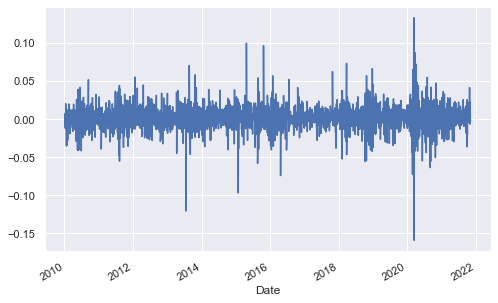

In [19]:
MSFT['log_return'].plot(figsize=(8, 5))
plt.show()

Estimate the daily and the annual mean of the obtained log returns.

In [20]:
log_return_d = MSFT['log_return'].mean()
log_return_d

0.0008846669279941928

In [21]:
log_return_a = MSFT['log_return'].mean() * 250
log_return_a

0.2211667319985482

Print the result in a presentable form

In [22]:
print (str(round(log_return_a, 5) * 100) + ' %')

22.117 %


An index selection method slices a table according to your preferences. It is a powerful feature of the Pandas package. What you have learned about dictionaries, lists, and NumPy will be very helpful here.

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period  from yahoo '2010-01-01' until today.

In [35]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Close']

In [36]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2984 entries, 2010-01-04 to 2021-11-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      2984 non-null   float64
 1   F       2984 non-null   float64
 2   XOM     2984 non-null   float64
 3   LNC     2984 non-null   float64
 4   AAPL    2984 non-null   float64
dtypes: float64(5)
memory usage: 139.9 KB


In [37]:
mydata.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2010-01-04,59.150002,10.28,69.150002,25.879999,7.643214
2010-01-05,59.570000,10.96,69.419998,26.420000,7.656429
2010-01-06,59.880001,11.37,70.019997,26.820000,7.534643
2010-01-07,59.860001,11.66,69.800003,27.450001,7.520714
2010-01-08,60.000000,11.69,69.519997,27.030001,7.570714


In [38]:
mydata.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2021-11-02,27.940001,18.010000,64.820000,74.110001,150.020004
2021-11-03,27.260000,18.629999,63.930000,76.129997,151.490005
2021-11-04,27.309999,19.420000,64.410004,71.809998,150.960007
2021-11-05,27.850000,19.290001,65.019997,72.459999,151.279999
2021-11-08,28.070000,20.020000,65.995003,73.500000,150.699997


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method).

In [39]:
mydata.iloc[0]

BP      59.150002
F       10.280000
XOM     69.150002
LNC     25.879999
AAPL     7.643214
Name: 2010-01-04 00:00:00, dtype: float64

Plotting the Stock Movement 

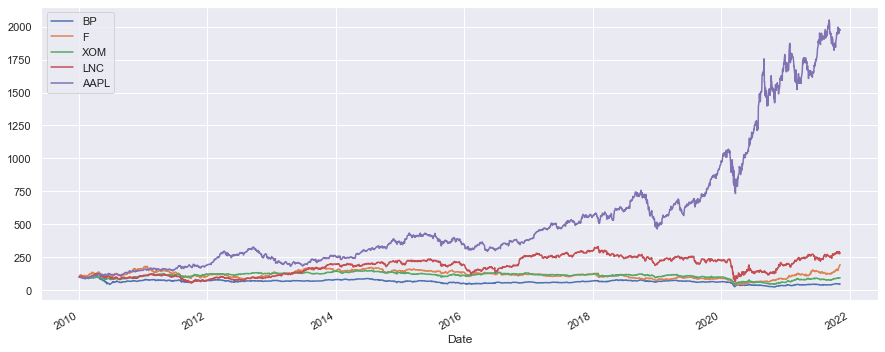

In [40]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [41]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.007101,0.066148,0.003905,0.020866,0.001729
2010-01-06,0.005204,0.037409,0.008643,0.015140,-0.015906
2010-01-07,-0.000334,0.025506,-0.003142,0.023490,-0.001849
2010-01-08,0.002339,0.002573,-0.004012,-0.015301,0.006648


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [42]:
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [43]:
annual_returns = returns.mean() * 250
annual_returns

BP     -0.014290
F       0.107584
XOM     0.025781
LNC     0.177846
AAPL    0.289106
dtype: float64

Calculating rate of return of stock portfolios using simple returns and log returns

In [44]:
np.dot(annual_returns, weights)

0.11720546903617546

Transform the result into a percentage form.

In [47]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

11.721 %


## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 4th of January 2010 until today.

Getting the Three indices from yahoo 

In [60]:
tickers = ['^DJI', '^GSPC', '^IXIC']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-4')['Adj Close']

In [61]:
ind_data.head()

,^DJI,^GSPC,^IXIC
Date,,,
2010-01-04,10583.959961,1132.989990,2308.419922
2010-01-05,10572.019531,1136.520020,2308.709961
2010-01-06,10573.679688,1137.140015,2301.090088
2010-01-07,10606.860352,1141.689941,2300.050049
2010-01-08,10618.190430,1144.979980,2317.169922


In [62]:
ind_data.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-11-02,36052.628906,4630.649902,15649.599609
2021-11-03,36157.578125,4660.569824,15811.580078
2021-11-04,36124.230469,4680.060059,15940.309570
2021-11-05,36327.949219,4697.529785,15971.589844
2021-11-08,36432.218750,4701.700195,15982.357422


Normalize the data to 100 and plot the results on a graph

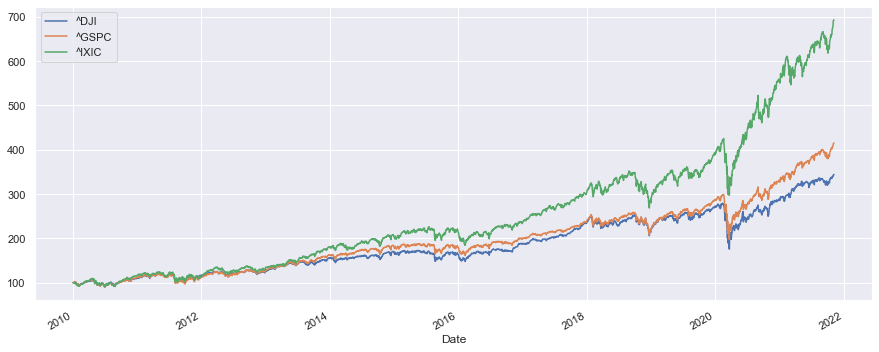

In [63]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

How would you explain the common and the different parts of the behavior of the three indices?

Obtain the simple returns of the indices.

In [65]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-11-02,0.003865,0.003680,0.003442
2021-11-03,0.002911,0.006461,0.010350
2021-11-04,-0.000922,0.004182,0.008141
2021-11-05,0.005639,0.003733,0.001962
2021-11-08,0.002870,0.000888,0.000674


Estimate the average annual return of each index.

In [69]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns
print (annual_ind_returns)

^DJI     0.118118
^GSPC    0.134007
^IXIC    0.180819
dtype: float64


## Calculating the Risk of a Security

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2010-1-4’ until today.
Assess the daily and the annual risk of ‘MSFT’, and for Apple for the same timeframe.

In [71]:
tickers = ['MSFT', 'AAPL']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-4')['Adj Close']

In [72]:
returns = np.log(data / data.shift(1))
returns

,MSFT,AAPL
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000323,0.001728
2010-01-06,-0.006156,-0.016034
2010-01-07,-0.010454,-0.001850
2010-01-08,0.006873,0.006627
...,...,...
2021-11-02,0.011351,0.007091
2021-11-03,0.002608,0.009751
2021-11-04,0.007279,-0.003505


### MSFT

Daily risk:

In [73]:
returns['MSFT'].std()

0.01579551322555197

Annual risk:

In [74]:
returns['MSFT'].std() * 250 ** 0.5

0.24974899302028586

### Apple

Daily risk:

In [75]:
returns['AAPL'].std()

0.0176847076795559

Annual risk:

In [77]:
returns['AAPL'].std() * 250 ** 0.5

0.279619780108339

******

Store the volatilities of the two stocks in an array called "vols".

In [79]:
vols = returns[['MSFT', 'AAPL']].std() * 250 ** 0.5
vols

MSFT    0.249749
AAPL    0.279620
dtype: float64

How are the two risk values different?

## Calculating Covariance and Correlation

Consider a portfolio composed of Walmart and Facebook. we expect the returns of these companies to show high or low covariance? Or, we guess that the correlation would be closer to 0 or closer to 1

We Begin by extracting data for Walmart and Facebook from the 1st of January 2014 until today.

In [80]:
tickers = ['WMT', 'FB']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2014-1-1')['Adj Close']

In [81]:
sec_data.head()

,WMT,FB
Date,,
2014-01-02,66.034134,54.709999
2014-01-03,65.816536,54.560001
2014-01-06,65.448341,57.200001
2014-01-07,65.649178,57.919998
2014-01-08,65.130333,58.230000


In [82]:
returns = np.log(sec_data / sec_data.shift(1))
returns

,WMT,FB
Date,,
2014-01-02,NaN,NaN
2014-01-03,-0.003301,-0.002745
2014-01-06,-0.005610,0.047253
2014-01-07,0.003064,0.012509
2014-01-08,-0.007935,0.005338
...,...,...
2021-11-02,-0.000467,-0.005775
2021-11-03,0.003068,0.010732
2021-11-04,0.007298,0.012675


How to explain the difference between their means and their standard deviations?

In [83]:
returns[['WMT', 'FB']].mean() * 250

WMT    0.103134
FB     0.230505
dtype: float64

In [84]:
returns[['WMT', 'FB']].std() * 250 ** 0.5

WMT    0.203668
FB     0.320300
dtype: float64

***

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

****

Calculating daily and annual covariance and Correlation using the 250 trading days for one year

In [87]:
cov_matrix = returns.cov()
cov_matrix

,WMT,FB
WMT,0.000166,0.00006
FB,0.000060,0.00041


In [88]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,WMT,FB
WMT,0.041481,0.014949
FB,0.014949,0.102592


Daily and annual correlation

In [89]:
corr_matrix = returns.corr()
corr_matrix

,WMT,FB
WMT,1.000000,0.229155
FB,0.229155,1.000000


In [90]:
corr_matrix_a = returns.corr() * 250
corr_matrix_a

,WMT,FB
WMT,250.000000,57.288808
FB,57.288808,250.000000


Would you consider investing in such a portfolio?

## Calculating Portfolio Risk

Calculate the risk of an equally weighted portfolio composed of Microsoft and Apple. The data can be obtained from Yahoo Finance for the period 4th of January 2010 until today. 

In [97]:
tickers = ['MSFT', 'AAPL']

stock_data = pd.DataFrame()

for t in tickers:
    stock_data[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-4')['Adj Close']

In [98]:
stock_data.tail()

,MSFT,AAPL
Date,,
2021-11-02,333.130005,149.801376
2021-11-03,334.000000,151.269241
2021-11-04,336.440002,150.740005
2021-11-05,336.059998,151.279999
2021-11-08,336.989990,150.440002


In [99]:
stock_returns = np.log(sec_data / sec_data.shift(1))

In [100]:
stock_returns

,MSFT,AAPL
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000323,0.001728
2010-01-06,-0.006156,-0.016034
2010-01-07,-0.010454,-0.001851
2010-01-08,0.006873,0.006627
...,...,...
2021-11-02,0.011351,0.007091
2021-11-03,0.002608,0.009751
2021-11-04,0.007279,-0.003505


## MSFT

In [102]:
stock_returns['MSFT'].mean()

0.0008864023837323311

In [103]:
stock_returns['MSFT'].mean() * 250

0.22160059593308276

In [104]:
stock_returns['MSFT'].std()

0.015795513194362353

In [105]:
stock_returns['MSFT'].std() * 250 ** 0.5

0.24974899252713473

## Apple

In [106]:
stock_returns['AAPL'].mean()

0.0010504987203408822

In [107]:
stock_returns['AAPL'].mean() * 250

0.26262468008522055

In [108]:
stock_returns['AAPL'].std()

0.017684712958637803

In [109]:
stock_returns['AAPL'].std() * 250 ** 0.5

0.2796198635779528

In [110]:
stock_returns[['MSFT', 'AAPL']].mean() * 250

MSFT    0.221601
AAPL    0.262625
dtype: float64

In [111]:
stock_returns[['MSFT', 'AAPL']].std() * 250 ** 0.5

MSFT    0.249749
AAPL    0.279620
dtype: float64

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

*****

In [114]:
cov_matrix = stock_returns.cov()
cov_matrix

,MSFT,AAPL
MSFT,0.000249,0.000158
AAPL,0.000158,0.000313


In [115]:
cov_matrix_a = stock_returns.cov() * 250
cov_matrix_a

,MSFT,AAPL
MSFT,0.062375,0.039409
AAPL,0.039409,0.078187


***

In [117]:
corr_matrix = stock_returns.corr()
corr_matrix

,MSFT,AAPL
MSFT,1.00000,0.56432
AAPL,0.56432,1.00000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [118]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [120]:
pfolio_var = np.dot(weights.T, np.dot(stock_returns.cov() * 250, weights))
pfolio_var

0.05484502725258259

Portfolio Volatility:

In [121]:
pfolio_vol = (np.dot(weights.T, np.dot(stock_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.2341901519120362

In [122]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

23.419 %


## Diversifiable and Non-Diversifiable Risk of a Portfolio

In [123]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2984 entries, 2010-01-04 to 2021-11-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2984 non-null   float64
 1   AAPL    2984 non-null   float64
dtypes: float64(2)
memory usage: 69.9 KB


Then, calculate the diversifiable and the non-diversifiable risk of a portfolio, composed of these two stocks:

In [124]:
stock_returns = np.log(stock_data / stock_data.shift(1))
stock_returns

,MSFT,AAPL
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000323,0.001727
2010-01-06,-0.006156,-0.016034
2010-01-07,-0.010454,-0.001851
2010-01-08,0.006872,0.006627
...,...,...
2021-11-02,0.011351,0.007091
2021-11-03,0.002608,0.009751
2021-11-04,0.007279,-0.003505


### Calculating Portfolio Variance

Equal weightings scheme:

In [132]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [127]:
pfolio_var = np.dot(weights.T, np.dot(stock_returns.cov() * 250, weights))
pfolio_var

0.054845035442206015

### Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

Diversifiable Risk:

In [129]:
MSFT_var_a = stock_returns[['MSFT']].var() * 250
MSFT_var_a

MSFT    0.062375
dtype: float64

In [131]:
AAPL_var_a = stock_returns[['AAPL']].var() * 250
AAPL_var_a

AAPL    0.078187
dtype: float64

Or:

In [133]:
MSFT_var_a = stock_returns['MSFT'].var() * 250
MSFT_var_a

0.06237455354541009

In [134]:
AAPL_var_a = stock_returns['AAPL'].var() * 250
AAPL_var_a

0.07818726262756771

Calculating Diversifiable Risk:

In [135]:
dr = pfolio_var - (weights[0] ** 2 * MSFT_var_a) - (weights[1] ** 2 * AAPL_var_a)
dr

0.019704581398961567

In [136]:
print (str(round(dr*100, 3)) + ' %')

1.97 %


Calculating Non-Diversifiable Risk:

In [137]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.03514045404324445

Or:

In [138]:
n_dr_2 = (weights[0] ** 2 * MSFT_var_a) + (weights[1] ** 2 * AAPL_var_a)
n_dr_2

0.03514045404324445

b) With weights 0.2 for Microsoft and 0.8 for Apple.

### Calculating Portfolio Variance

In [139]:
weights_2 = np.array([0.2, 0.8])

Portfolio Variance:

In [140]:
pfolio_var_2 = np.dot(weights_2.T, np.dot(stock_returns.cov() * 250, weights_2))
pfolio_var_2

0.06514576231879515

### Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

Calculating Diversifiable Risk:

In [141]:
dr_2 = pfolio_var_2 - (weights_2[0] ** 2 * MSFT_var_a) - (weights_2[1] ** 2 * AAPL_var_a)
dr_2

0.012610932095335405

In [142]:
print (str(round(dr*100, 3)) + ' %')

1.97 %


Calculating Non-Diversifiable Risk:

In [143]:
n_dr_2 = pfolio_var_2 - dr_2
n_dr_2

0.05253483022345975

Or:

In [144]:
n_dr_2 = (weights_2[0] ** 2 * MSFT_var_a) + (weights_2[1] ** 2 * AAPL_var_a)
n_dr_2

0.052534830223459755

## Running a Regression in Python

*A teacher at school decided her students should take an IQ test. She prepared 5 tests she believed were aligned with the requirements of the IQ examination.
The father of one child in the class turned out to be an econometrician, so he asked her for the results of the 30 kids. The file contained the points they earned on each test and the final IQ score.*

Load the IQ_data excel file. 

In [147]:
data = pd.read_excel('IQ_data.xlsx')

In [148]:
data

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,107,84,35,66,64,65,NaN,NaN,NaN
1,93,74,20,74,49,83,NaN,NaN,NaN
2,103,55,82,83,66,74,NaN,NaN,NaN
3,122,97,73,92,89,95,NaN,NaN,NaN
4,103,85,54,73,69,83,NaN,NaN,NaN
5,106,87,73,64,78,58,NaN,NaN,NaN
6,98,77,63,65,70,65,NaN,NaN,NaN
7,93,55,50,44,53,85,NaN,NaN,NaN
8,95,38,44,93,40,73,NaN,NaN,NaN
9,13,43,55,97,49,84,NaN,NaN,NaN


Prepare the data for a univariate regression of Test 1 based on the IQ result. Store the Test 1 scores in a variable, called X, and the IQ points in another variable, named Y. 

In [149]:
data[['IQ', 'Test 1']]

,IQ,Test 1
0,107,84
1,93,74
2,103,55
3,122,97
4,103,85
5,106,87
6,98,77
7,93,55
8,95,38
9,13,43


### Univariate Regression

In [150]:
X = data['Test 1']
Y = data['IQ']

Create a well-organized scatter plot. Use the “axis” method with the following start and end points: [0, 120, 0, 150]. Label the axes “Test 1” and “IQ”, respectively.

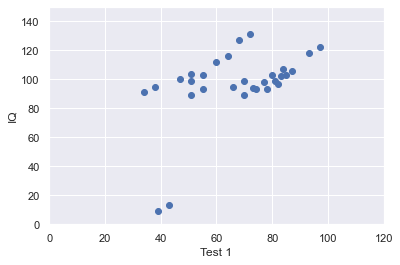

In [151]:
plt.scatter(X,Y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()


Just by looking at the graph, do you believe Test 1 is a good predictor of the final IQ score?

## Computing Alpha, Beta, and R Squared in Python 

*Running a Regression in Python - continued:*

se the statsmodels’ **.add_constant()** method to reassign the X data on X1. Use OLS with arguments Y and X1 and apply the fit method to obtain univariate regression results. Help yourself with the **.summary()** method. 

In [152]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [153]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Tue, 09 Nov 2021   Prob (F-statistic):            0.00411
Time:                        00:08:34   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Imagine a kid would score 84 on Test 1. How many points is she expected to get on the IQ test, approximately?

In [154]:
45 + 84*0.76

108.84

******

### Alpha, Beta, R^2:

Apply the stats module’s **linregress()** to extract the value for the slope, the intercept, the r squared, the p_value, and the standard deviation.

In [155]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [156]:
slope

0.758723457096734

In [157]:
intercept

45.88277660499194

In [158]:
r_value

0.5085667021566542

In [159]:
r_value ** 2

0.25864009054249504

In [160]:
p_value

0.004109055664218723

In [161]:
std_err

0.24275664244042755

We Use the values of the slope and the intercept to predict the IQ score of a child, who obtained 84 points on Test 1. Is the forecasted value different than the one we obtained above?

In [162]:
intercept + 84 * slope

109.61554700111759

******

We Follow the steps to draw the best fitting line of the provided regression.

We Define a function that will use the slope and the intercept value to calculate the dots of the best fitting line.

In [163]:
def fitline(b):
    return intercept + slope * b

We Apply it to the data we have stored in the variable X.

In [165]:
line = fitline(X)

Draw a scatter plot with the X and Y data and then plot X and the obtained fit-line.

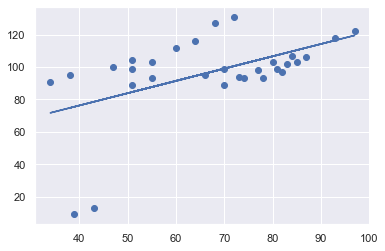

In [166]:
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

## Obtaining the Efficient Frontier

We will produce the Markowitz Efficient Frontier. 

Begin by extracting data for Walmart and Facebook from the 1st of January 2014 until today.

In [169]:
assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

We Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.

In [170]:
pf_data.tail()

,WMT,FB
Date,,
2021-11-02,149.720001,328.079987
2021-11-03,150.179993,331.619995
2021-11-04,151.279999,335.850006
2021-11-05,150.229996,341.130005
2021-11-08,149.270004,338.619995


<AxesSubplot:xlabel='Date'>

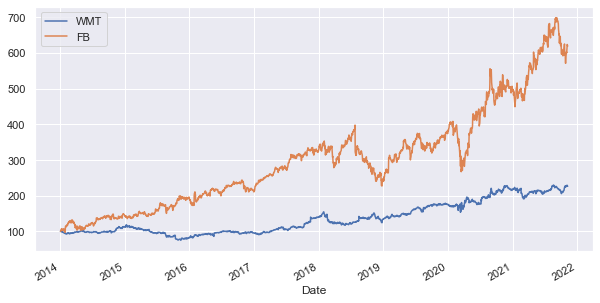

In [171]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

Calculate their logarithmic returns.

In [172]:
log_returns = np.log(pf_data / pf_data.shift(1))

Create a variable that carries the number of assets in your portfolio.

In [174]:
num_assets = len(assets)

In [175]:
num_assets

2

The portfolio need not be equally weighted. So, we create a variable, called “weights”. We Let it contain as many randomly generated values as there are assets our portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [176]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.62231351, 0.37768649])

Sum the obtained values to obtain 1 – summing up the weights to 100%!

In [177]:
weights[0] + weights[1]

1.0

In [178]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.4179127, 0.5820873])

Now, we estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [179]:
np.sum(weights * log_returns.mean()) * 250

0.1772750061463713

Expected Portfolio Variance:

In [181]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04927839259418463

Expected Portfolio Volatility:

In [182]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.22198737034837057

***

1)	We Create two empty lists. Name them pf_returns and pf_volatilites.

In [183]:
pfolio_returns = []
pfolio_volatilities = []

2)	We Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [184]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.1597937821322349,
  0.17673787625874443,
  0.19238864663737332,
  0.16664062077843866,
  0.21905346893393424,
  0.17559119782678734,
  0.21452130986452494,
  0.17119294887998268,
  0.1821934090817664,
  0.20416285325330003,
  0.13240162631183294,
  0.16800204738584085,
  0.22368443790625842,
  0.1954747379820582,
  0.16505771202226355,
  0.18805729218305262,
  0.16369225814080832,
  0.20088038813632916,
  0.18758087162873693,
  0.16810599372571408,
  0.13877483538782642,
  0.19053277556932388,
  0.1616627230591261,
  0.22041948157024413,
  0.1857329758357996,
  0.13479207298872053,
  0.1692318725535388,
  0.17846918107494278,
  0.14854193911305433,
  0.16465366310243276,
  0.19040083641387048,
  0.16689250512674775,
  0.17443123222617338,
  0.19208350170936164,
  0.10666507709683466,
  0.17947755519307407,
  0.14004822064684913,
  0.15792811118122166,
  0.15234426246088903,
  0.18597049732235943,
  0.18131374072579293,
  0.1683327669014232,
  0.18977001198868193,
  0.15958189084198

3)	We Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [185]:
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.15979378, 0.17673788, 0.19238865, 0.16664062, 0.21905347,
        0.1755912 , 0.21452131, 0.17119295, 0.18219341, 0.20416285,
        0.13240163, 0.16800205, 0.22368444, 0.19547474, 0.16505771,
        0.18805729, 0.16369226, 0.20088039, 0.18758087, 0.16810599,
        0.13877484, 0.19053278, 0.16166272, 0.22041948, 0.18573298,
        0.13479207, 0.16923187, 0.17846918, 0.14854194, 0.16465366,
        0.19040084, 0.16689251, 0.17443123, 0.1920835 , 0.10666508,
        0.17947756, 0.14004822, 0.15792811, 0.15234426, 0.1859705 ,
        0.18131374, 0.16833277, 0.18977001, 0.15958189, 0.13365764,
        0.1841028 , 0.1219173 , 0.15411193, 0.18634485, 0.1593794 ,
        0.16761899, 0.18080827, 0.11081003, 0.17336063, 0.21484885,
        0.10962464, 0.1924045 , 0.11577589, 0.10552816, 0.16032882,
        0.11666972, 0.19617576, 0.12316317, 0.19028281, 0.21443275,
        0.16009459, 0.14031017, 0.16787123, 0.16231728, 0.15965011,
        0.10341124, 0.20242066, 0.22444081, 0.12

Now, we create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [187]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [188]:
portfolios.head()

,Return,Volatility
0,0.159794,0.201169
1,0.176738,0.221232
2,0.192389,0.245686
3,0.166641,0.208343
4,0.219053,0.296236


In [189]:
portfolios.tail()

,Return,Volatility
995,0.179271,0.224851
996,0.213048,0.284100
997,0.191300,0.243836
998,0.169138,0.211289
999,0.193137,0.246969


Finally, we plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
We Organize the chart well and make sure we have labeled both the x- and the y- axes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Expected Return')

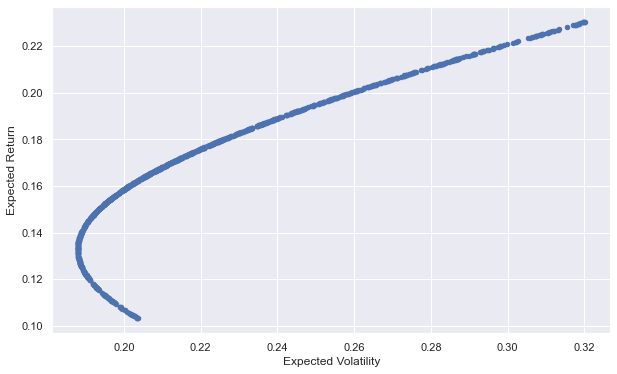

In [190]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

We re-created the Markowitz Efficient Frontier for 3 stocks? The code we have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). We Insert it in our data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

We can interpret the obtained graph 


In [191]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [192]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,66.034119,54.709999,29.554787
2014-01-03,65.816544,54.560001,29.487036
2014-01-06,65.448341,57.200001,29.567102
2014-01-07,65.649178,57.919998,29.905897
2014-01-08,65.130348,58.230000,30.016777


In [193]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [194]:
num_assets = len(assets)
num_assets

3

In [195]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.33379195, 0.14736548, 0.51884257])

In [196]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [197]:
np.sum(weights * log_returns.mean()) * 250

0.0648950298663095

Expected Portfolio Variance:

In [198]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04263059748734886

Expected Portfolio Volatility:

In [199]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20647178375591388

*****

In [200]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.16132563,  0.12850074,  0.12665941,  0.09651995,  0.124029  ,
         0.08426449,  0.1319787 ,  0.15842046,  0.08064303,  0.14924663,
         0.04458325,  0.11312574,  0.17174632,  0.06728041,  0.11354596,
         0.11053652,  0.11645498,  0.07132174,  0.04324357,  0.11042267,
         0.10351785,  0.09801742,  0.09811923,  0.10869252,  0.08271959,
         0.16559897,  0.05477506,  0.07051291,  0.12720049,  0.15969576,
         0.10622511,  0.10485215,  0.11798928,  0.06158718,  0.08494055,
         0.11981927,  0.12455139,  0.0715352 ,  0.10342212,  0.14762373,
         0.09672841,  0.12504404,  0.07232134,  0.06013304,  0.10186153,
         0.0819908 ,  0.13432654,  0.12714527,  0.11895396,  0.08897957,
         0.11066348,  0.19237399,  0.14522814,  0.06752478,  0.09449865,
         0.18177849,  0.08982434,  0.11476132,  0.10408254,  0.05747477,
         0.10189098,  0.08062886,  0.12470388,  0.08191529,  0.14148285,
         0.09366129,  0.12449129,  0.08933094,  0.1

In [201]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Expected Return')

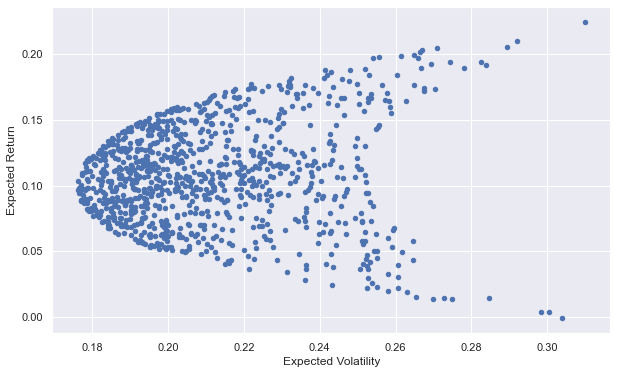

In [202]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Calculating the Beta of a Stock

Obtain data for Microsoft and S&P 500 for the period 1st of January 2012 – 31st of December 2016 from Yahoo Finance. 

In [203]:
tickers = ['MSFT', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close']

Let S&P 500 act as the market. 

*****

We Calculate the beta of Microsoft.

In [204]:
stock_returns = np.log( data / data.shift(1) )

In [205]:
cov = stock_returns.cov() * 250
cov

,MSFT,^GSPC
MSFT,0.053781,0.018213
^GSPC,0.018213,0.016362


In [206]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.018212773669257828

In [207]:
market_var = stock_returns['^GSPC'].var() * 250
market_var

0.016361631002308474

** Beta: **
### $$ 
\beta_{pg} = \frac{\sigma_{pg,m}}{\sigma_{m}^2}
$$

In [208]:
MSFT_beta = cov_with_market / market_var
MSFT_beta

1.1131392504016362

## Calculating the Expected Return of a Stock (CAPM)

Load the data for Microsoft and S&P 500 for the period 1st of January 2012 – 31st of December 2020. 
Let S&P 500 act as the market. 
Calculate the beta of Microsoft.

In [209]:
tickers = ['MSFT']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2020-1-31')['Adj Close']

Assume a risk-free rate of 2.5% and a risk premium of 5%. <br />
Estimate the expected return of Microsoft.

**Calculate the expected return of P&G (CAPM):**
### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [214]:
MSFT_er = 0.025 + MSFT_beta * 0.05
MSFT_er

0.08065696252008181

Calculate the Sharpe ratio in Python.

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [215]:
Sharpe = (MSFT_er - 0.025) / (sec_returns['MSFT'].std() * 250 ** 0.5)
Sharpe

0.24662327047313712

## Running a Multivariate Regression in Python

We continue working on the file we used when we worked on univariate regressions.

Run a multivariate regression with 5 independent variables – from Test 1 to Test 5.

In [217]:
data = pd.read_excel('IQ_data.xlsx')

In [218]:
data

,IQ,Test 1,Test 2,Test 3,Test 4,Test 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,107,84,35,66,64,65,NaN,NaN,NaN
1,93,74,20,74,49,83,NaN,NaN,NaN
2,103,55,82,83,66,74,NaN,NaN,NaN
3,122,97,73,92,89,95,NaN,NaN,NaN
4,103,85,54,73,69,83,NaN,NaN,NaN
5,106,87,73,64,78,58,NaN,NaN,NaN
6,98,77,63,65,70,65,NaN,NaN,NaN
7,93,55,50,44,53,85,NaN,NaN,NaN
8,95,38,44,93,40,73,NaN,NaN,NaN
9,13,43,55,97,49,84,NaN,NaN,NaN


### Multivariate Regression:

Independent Variables: *Test 1, Test 2, Test 3, Test 4, Test 5*

In [219]:
X = data[['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']]
Y = data['IQ']

In [221]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     3.420
Date:                Tue, 09 Nov 2021   Prob (F-statistic):             0.0179
Time:                        01:09:56   Log-Likelihood:                -131.36
No. Observations:                  30   AIC:                             274.7
Df Residuals:                      24   BIC:                             283.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.5185     33.275      2.270      0.033       6.843     144.194
Test 1        -0.0495      0.554     -0.089      0.930      -1.194       1.095
Test 2        -0.3442      0.355     -0.971      0.341      -1.076       0.388
Test 3        -0.4229      0.317     -1.334      0.195      -1.077       0.231
Test 4         1.2706      0.882      1.441      0.162      -0.549       3.090
Test 5        -0.1029      0.292     -0.353      0.727      -0.705       0.499
==============================================================================
Omnibus:                       13.240   Durbin-Watson:                   2.684
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.706
Skew:                          -1.235   Prob(JB):                      0.00106
Kurtosis:                       5.205   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value of the variable Test 1 in the univariate regression looked very promising. Is it still low? If not – what do you think would be the reason for the change?

********

We Try regressing Test 1 and Test 2 on the IQ score first. Then, regress Test 1, 2, and 3 on IQ, and finally, regress Test 1, 2, 3, and 4 on IQ. What is the Test 1 p-value in these regressions?

Independent Variables: *Test 1, Test 2*

In [222]:
X = data[['Test 1', 'Test 2']]
Y = data['IQ']

In [223]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 09 Nov 2021   Prob (F-statistic):             0.0173
Time:                        01:11:28   Log-Likelihood:                -134.92
No. Observations:                  30   AIC:                             275.8
Df Residuals:                      27   BIC:                             280.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2256     19.658      2.250      0.033       3.891      84.560
Test 1         0.7549      0.248      3.043      0.005       0.246       1.264
Test 2         0.0327      0.193      0.170      0.867      -0.363       0.429
==============================================================================
Omnibus:                       18.165   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.499
Skew:                          -1.524   Prob(JB):                     7.89e-06
Kurtosis:                       6.085   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Independent Variables: *Test 1, Test 2, Test 3*

In [228]:
X = data[['Test 1', 'Test 2', 'Test 3']]
Y = data['IQ']

In [229]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     4.579
Date:                Tue, 09 Nov 2021   Prob (F-statistic):             0.0105
Time:                        01:15:52   Log-Likelihood:                -133.06
No. Observations:                  30   AIC:                             274.1
Df Residuals:                      26   BIC:                             279.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.4940     29.595      2.923      0.007      25.660     147.328
Test 1         0.6339      0.246      2.572      0.016       0.127       1.141
Test 2         0.1152      0.190      0.606      0.550      -0.276       0.506
Test 3        -0.5465      0.295     -1.851      0.076      -1.153       0.060
==============================================================================
Omnibus:                        8.771   Durbin-Watson:                   2.818
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.131
Skew:                          -1.019   Prob(JB):                       0.0283
Kurtosis:                       4.245   Cond. No.                         852.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Independent Variables: *Test 1, Test 2, Test 3, Test 4*

In [230]:
X = data[['Test 1', 'Test 2', 'Test 3', 'Test 4']]
Y = data['IQ']

In [231]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     4.398
Date:                Tue, 09 Nov 2021   Prob (F-statistic):            0.00790
Time:                        01:16:33   Log-Likelihood:                -131.43
No. Observations:                  30   AIC:                             272.9
Df Residuals:                      25   BIC:                             279.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.8868     30.034      2.360      0.026       9.030     132.743
Test 1        -0.1220      0.506     -0.241      0.811      -1.164       0.920
Test 2        -0.3705      0.341     -1.088      0.287      -1.072       0.331
Test 3        -0.4644      0.289     -1.606      0.121      -1.060       0.131
Test 4         1.3775      0.813      1.694      0.103      -0.297       3.053
==============================================================================
Omnibus:                       13.831   Durbin-Watson:                   2.777
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.836
Skew:                          -1.260   Prob(JB):                     0.000600
Kurtosis:                       5.349   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It seems it increases a lot when we add the result from Test 4. 

****

Run a regression with only Test 1 and Test 4 as independent variables. How would you interpret the p-values in this case?

Independent Variables: *Test 1, Test 4*

In [232]:
X = data[['Test 1', 'Test 4']]
Y = data['IQ']

In [233]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     5.637
Date:                Tue, 09 Nov 2021   Prob (F-statistic):            0.00900
Time:                        01:18:05   Log-Likelihood:                -134.19
No. Observations:                  30   AIC:                             274.4
Df Residuals:                      27   BIC:                             278.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8727     20.007      1.643      0.112      -8.178      73.923
Test 1         0.4339      0.367      1.181      0.248      -0.320       1.187
Test 4         0.5396      0.460      1.173      0.251      -0.405       1.484
==============================================================================
Omnibus:                       19.846   Durbin-Watson:                   2.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.196
Skew:                          -1.639   Prob(JB):                     1.24e-06
Kurtosis:                       6.319   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Independent Variables: *Test 4*

In [234]:
X = data[['Test 4']]
Y = data['IQ']

In [235]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.741
Date:                Tue, 09 Nov 2021   Prob (F-statistic):            0.00415
Time:                        01:18:48   Log-Likelihood:                -134.95
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5060     20.022      1.773      0.087      -5.507      76.519
Test 4         0.9497      0.304      3.121      0.004       0.326       1.573
==============================================================================
Omnibus:                       24.727   Durbin-Watson:                   2.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.594
Skew:                          -1.950   Prob(JB):                     1.53e-09
Kurtosis:                       7.155   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Suggested Answer:***
*Test 1 and Test 4 are correlated, and they contribute to the preparation of the IQ test in a similar way.*

## Monte Carlo - Predicting Gross Profit

Case study an experienced manager wants to forecasted revenues of \$200mln, with an expected deviation of $10mln. we are convinced Cogs will be near 40% of the revenues, and their expected deviation is 20% of its own value. 

We Use NumPy’s random.random function to simulate the potential revenue stream for 250 iterations (which is the number of trading days in a year) and then the predicted Cogs value. 

In [238]:
rev_m = 200
rev_stdev = 10
iterations = 250

In [239]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([200.81774553, 197.18899775, 205.85207068, 206.25316659,
       214.29696584, 216.5963581 , 205.94253284, 202.70055324,
       208.67038367, 207.27420292, 182.18987134, 199.83547898,
       209.15323627, 198.38758237, 197.67122215, 200.03217697,
       197.31045513, 214.01524003, 200.93769095, 215.21604947,
       197.7577558 , 210.00135592, 200.1294924 , 190.37285754,
       207.28603118, 192.09003516, 206.08323714, 195.97193792,
       198.94644406, 203.3433894 , 205.0607755 , 207.6636432 ,
       190.70274506, 197.12597101, 214.47022705, 192.55953745,
       206.34711789, 201.20365782, 201.37262344, 202.38619838,
       203.25011851, 205.08747861, 192.63935912, 198.1121896 ,
       195.48318685, 202.30322098, 186.18004954, 198.33559172,
       195.61361702, 200.32573627, 196.2790891 , 218.19238959,
       195.96494927, 177.90978818, 190.85524429, 196.66918555,
       195.32206213, 201.69647599, 185.939892  , 190.53067882,
       210.99115215, 191.57175327, 205.63087812, 189.09

Plot the obtained data for revenues and Cogs on a graph and observe the behavior of the obtained values.

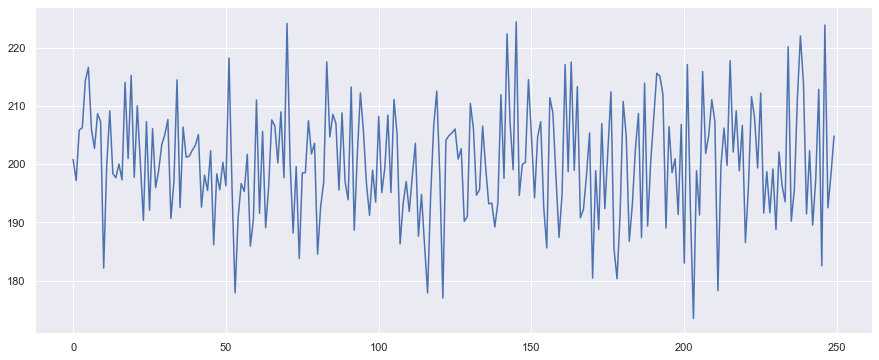

In [240]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

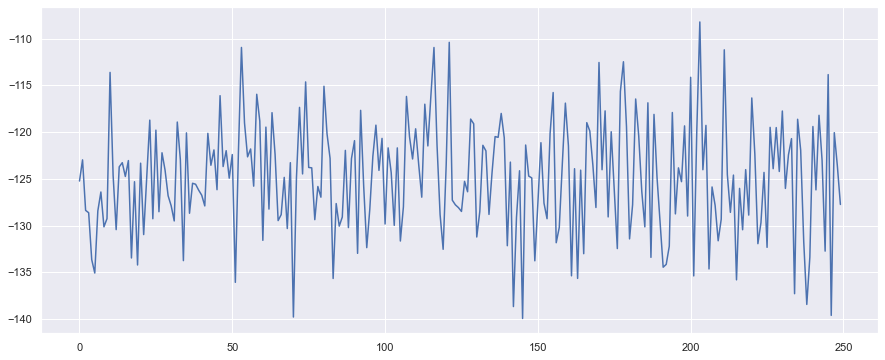

In [241]:
COGS = - (rev * np.random.normal(0.4,0.2))
 
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

Cogs mean:

In [242]:
COGS.mean()

-124.94780323429553

Cogs std:

In [243]:
COGS.std()

5.996653656299983

In [244]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
COGS = - (rev * np.random.normal(0.4,0.2))

COGS.mean(), COGS.std()

(-136.3499967550865, 7.116346713189261)

****

Based on the predicted revenue and Cogs values, estimate the expected Gross Profit of your company. 

*We must note: Estimating the gross profit. If we have stored the Cogs value as a negative number, the gross profit will equal revenues plus Cogs. If we have created Cogs as a positive value, then gross profit would be equal to revenues minus Cogs. Either way, we will obtain the same result for gross profit.* 

In [245]:
Gross_Profit = rev + COGS
Gross_Profit

array([68.26287614, 59.77097751, 61.56054988, 66.58598602, 66.94804759,
       61.69796769, 64.9331574 , 65.83747333, 68.81129181, 64.97622012,
       61.18106316, 67.97794248, 67.11327187, 63.13166248, 66.60429799,
       65.42777175, 65.15516137, 64.80194894, 60.64202194, 62.90743993,
       63.75624887, 65.87099482, 61.60831386, 66.63392727, 59.07071943,
       62.13010747, 59.27816828, 66.13301844, 69.09480509, 67.4945236 ,
       62.29929314, 66.59101098, 67.28141443, 58.2368767 , 67.45507646,
       67.58206925, 65.52641253, 56.28942399, 59.48343611, 68.58254786,
       68.23926419, 62.27532101, 63.76716252, 62.26136301, 62.24663153,
       59.92782379, 63.43216713, 65.2643785 , 63.26136177, 70.27101705,
       67.69034568, 57.59858222, 63.56919513, 55.8632382 , 65.6232021 ,
       63.87309694, 67.88654058, 61.00134145, 62.38268114, 63.66864681,
       61.76850516, 61.11517395, 66.03138934, 67.17892259, 64.92557288,
       61.71217487, 62.96987143, 61.67462709, 58.54273077, 59.24

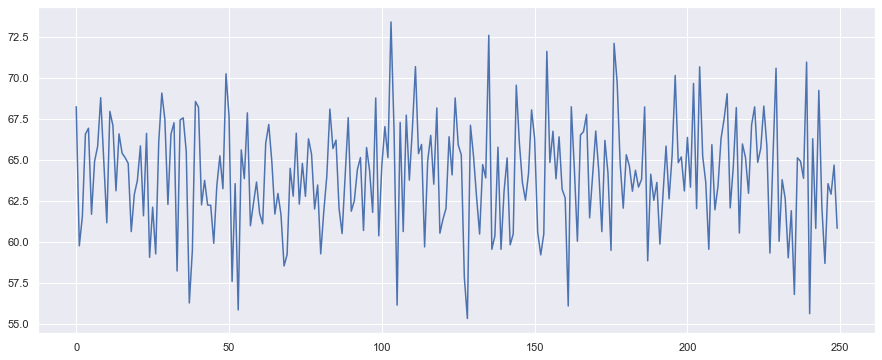

In [246]:
plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

What is the maximum and what is the minimum gross profit value you obtained?

In [247]:
max(Gross_Profit)

73.43271062981083

In [248]:
min(Gross_Profit)

55.34069129334793

What is its mean and standard deviation?

In [249]:
Gross_Profit.mean()

64.1256324667389

In [250]:
Gross_Profit.std()

3.3468298107519856

We must remember what a histogram is? we Plot the gross profit data on a histogram. Use 20 bins directly to check the distribution of the data.

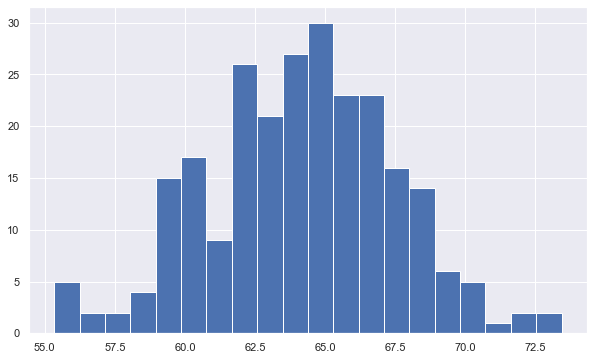

In [251]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

## Monte Carlo - Forecasting Stock Prices

Download the data for Microsoft (‘MSFT’) from Yahoo Finance for the period ‘2010-1-4’ until today.

In [252]:
ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-4')['Adj Close']

We Use the .pct_change() method to obtain the log returns of Microsoft for the designated period.

In [253]:
log_returns = np.log(1 + data.pct_change())

In [254]:
log_returns.tail()

,MSFT
Date,
2021-11-02,0.011351
2021-11-03,0.002608
2021-11-04,0.007279
2021-11-05,-0.001130
2021-11-08,0.002764


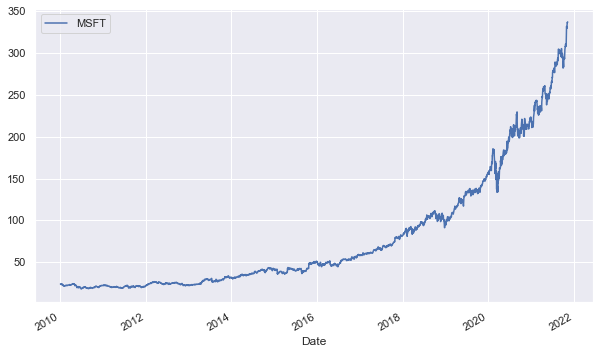

In [255]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

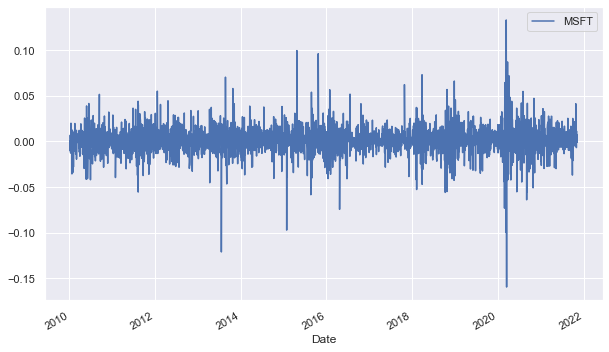

In [256]:
log_returns.plot(figsize = (10, 6))

We Assign the mean value of the log returns to a variable, called “U”, and their variance to a variable, called “var”. 

In [257]:
u = log_returns.mean()
u

MSFT    0.000886
dtype: float64

In [258]:
var = log_returns.var()
var

MSFT    0.000249
dtype: float64

Calculate the drift, using the following formula: 

$$
drift = u - \frac{1}{2} \cdot var
$$

In [259]:
drift = u - (0.5 * var)
drift

MSFT    0.000762
dtype: float64

We Store the standard deviation of the log returns in a variable, called “stdev”.

In [260]:
stdev = log_returns.std()
stdev

MSFT    0.015796
dtype: float64

In [261]:
log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

******

Use “.values” to transform the *drift* and the *stdev* objects into arrays. 

In [264]:
type(drift)

pandas.core.series.Series

In [265]:
drift.values

array([0.00076165])

In [266]:
type(stdev)

pandas.core.series.Series

In [267]:
stdev.values

array([0.01579552])

Forecast future stock prices for every trading day a year ahead. So, assign 250 to “t_intervals”. <br />
Let’s examine 10 possible outcomes. Bind “iterations” to the value of 10.

In [268]:
t_intervals = 250
iterations = 10

We Use the formula below to calculate daily returns.

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br \>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [270]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99959716, 1.01874908, 0.98300633, ..., 1.0007409 , 1.00757426,
        1.02136026],
       [1.02535387, 1.02913755, 1.00364637, ..., 0.98301648, 0.9808505 ,
        0.99852422],
       [1.03258158, 0.98367871, 0.99157376, ..., 0.99669879, 0.98968213,
        0.95556021],
       ...,
       [0.99356175, 0.97399828, 1.01033655, ..., 0.9874381 , 0.97536785,
        0.9920708 ],
       [0.99847314, 1.00079807, 0.98785909, ..., 1.01025967, 1.00816994,
        1.00345054],
       [0.98209623, 1.00454429, 1.01597857, ..., 0.98400237, 1.00258231,
        1.00193145]])

***

We Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [272]:
S0 = data.iloc[-1]
S0

MSFT    336.98999
Name: 2021-11-08 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [273]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [274]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We Set the values on the first row of the price_list array equal to S0.

In [275]:
price_list[0] = S0
price_list

array([[336.98999023, 336.98999023, 336.98999023, ..., 336.98999023,
        336.98999023, 336.98999023],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

We Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [276]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [277]:
price_list

array([[336.98999023, 336.98999023, 336.98999023, ..., 336.98999023,
        336.98999023, 336.98999023],
       [345.53399059, 346.8090514 , 338.21877913, ..., 331.26671279,
        330.5367999 , 336.49266614],
       [356.7920335 , 341.14867983, 335.36886517, ..., 330.1731324 ,
        327.12636299, 321.53900358],
       ...,
       [509.67711978, 564.51832182, 436.29592382, ..., 302.19071001,
        301.21433116, 280.13959856],
       [508.89891623, 564.96884757, 430.99889464, ..., 305.29108626,
        303.67523533, 281.10623028],
       [499.78770962, 567.53622871, 437.88564064, ..., 300.40715314,
        304.45941868, 281.64917364]])

Finally, we plot the obtained price list data.

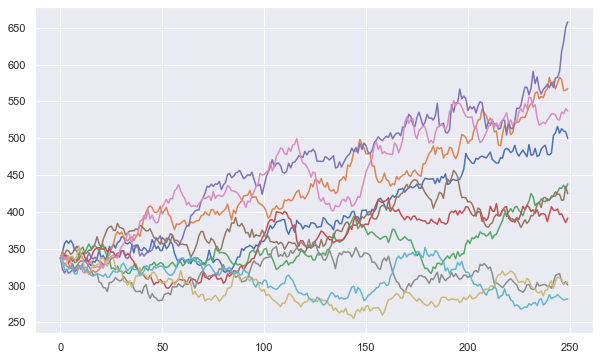

In [279]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

## Monte Carlo - Black-Scholes-Merton

We have written a few lines of code that will import the documents we need and define the functions estimating d1, d2, and the Black-Scholes-Merton formula. 

In [280]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [281]:
log_returns = np.log(1 + data.pct_change())

In [282]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.249749
dtype: float64

We Set the risk free rate, r, equal to 2.5% (0.025); the strike price, K, equal to 110.0; and the time horizon, T, equal to 1, respectively.

In [283]:
r = 0.025
K = 110.0
T = 1

Create a variable S equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [284]:
S = data.iloc[-1]
S

MSFT    336.98999
Name: 2021-11-08 00:00:00, dtype: float64

We Call the d1 and d2 functions with the relevant arguments to obtain their values.

In [286]:
d1(S, K, r, stdev, T)

MSFT    4.707766
dtype: float64

In [287]:
d2(S, K, r, stdev, T)

MSFT    4.458017
dtype: float64

We Use the BSM function to estimate the price of a call option, given we know the values of S, K, r, stdev, and T.

In [288]:
BSM(S, K, r, stdev, T)

MSFT    229.705922
Name: 2021-11-08 00:00:00, dtype: float64

## Monte Carlo - Euler Discretization 

Store the annual standard deviation of the log returns in a variable, called “stdev”.

In [290]:
log_returns = np.log(1 + data.pct_change())

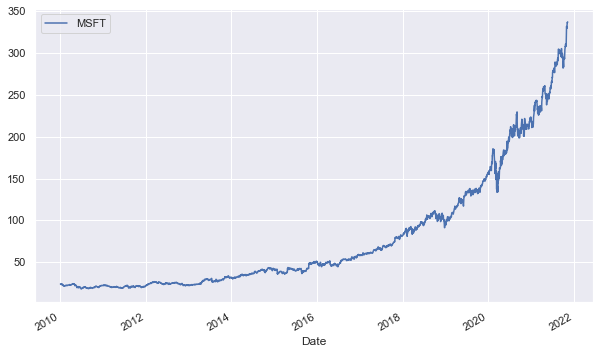

In [291]:
data.plot(figsize=(10, 6));

In [292]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.249749
dtype: float64

We Set the risk free rate, r, equal to 2.5% (0.025); the strike price, K, equal to 110.0; and the time horizon, T, equal to 1, respectively.

In [296]:
r = 0.025
K = 110.0
T = 1

We Create a variable S equal to the last adjusted closing price of Microsoft. We Use the “iloc” method.

In [297]:
S = data.iloc[-1]
S

MSFT    336.98999
Name: 2021-11-08 00:00:00, dtype: float64

We Call the d1 and d2 functions with the relevant arguments to obtain their values.

In [298]:
d1(S, K, r, stdev, T)

MSFT    4.707766
dtype: float64

In [299]:
d2(S, K, r, stdev, T)

MSFT    4.458017
dtype: float64

We Use the BSM function to estimate the price of a call option, given you know the values of S, K, r, stdev, and T.

In [300]:
BSM(S, K, r, stdev, T)

MSFT    229.705922
Name: 2021-11-08 00:00:00, dtype: float64

## Monte Carlo - Euler Discretization

We Set the time horizon, T, equal to 1 year, the number of time intervals equal to 250, the iterations equal to 10,000. We Create a variable, delta_t, equal to the quotient of T divided by the number of time intervals.

In [317]:
stdev = stdev.values
stdev

array([0.24974906])

In [310]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Let Z equal a random matrix with dimension (time intervals + 1) by the number of iterations. 

In [312]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  

We Use the .zeros_like() method to create another variable, S, with the same dimension as Z. S is the matrix to be filled with future stock price data. 

In [313]:
S = np.zeros_like(Z) 

We Create a variable S0 equal to the last adjusted closing price of Microsoft. We Use the “iloc” method.

In [314]:
S0 = data.iloc[-1]  
S[0] = S0 

We Use the following formula to create a loop within the range (1, t_intervals + 1) that reassigns values to S in time t.


$$
S_t = S_{t-1} \cdot exp((r - 0.5 \cdot stdev^2) \cdot delta_t + stdev \cdot delta_t^2 \cdot Z_t)
$$

In [318]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [319]:
S

array([[336.98999023, 336.98999023, 336.98999023, ..., 336.98999023,
        336.98999023, 336.98999023],
       [333.74794854, 328.3726926 , 335.25744614, ..., 336.50489963,
        331.77868634, 333.14332064],
       [338.39286432, 321.4580783 , 338.74722842, ..., 333.01455104,
        329.38284957, 337.52848934],
       ...,
       [264.68350301, 440.09788095, 248.68683291, ..., 458.06314109,
        263.83139712, 291.28515443],
       [272.19766621, 443.32443835, 244.85036429, ..., 459.70338393,
        266.55913459, 289.30417291],
       [267.88905509, 437.0931915 , 251.69190442, ..., 471.74174461,
        263.08063529, 294.03767954]])

In [320]:
S.shape

(251, 10000)

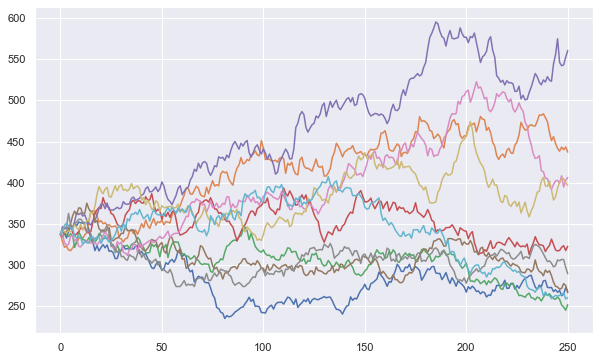

In [322]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

We Use numpy.maximum to create a vector with as many elements as there are columns in the S matrix.

In [323]:
p = np.maximum(S[-1] - 110, 0)

In [324]:
p

array([157.88905509, 327.0931915 , 141.69190442, ..., 361.74174461,
       153.08063529, 184.03767954])

In [325]:
p.shape

(10000,)

We Use the following formula to forecast the price of a stock option.

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [326]:
np.sum(p)

2349789.4106067712

In [327]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

229.17729033439974

Because this pricing model is based on random iterations, you will obtain a different result every time you re-run the code in this document. Expand the “Kernel” list from the Jupyter menu and click on “Restart and run all”/”Restart & run all cells” to verify this is true.